In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [2]:
data_folder = r"E:\data\gst-0815-23\N9E12\CrowdInteraction"
share_prob_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
gg_performance_across_prob, gs_performance_across_prob, sg_performance_across_prob, ss_performance_across_prob = [], [], [], []
gg_variance_across_prob, gs_variance_across_prob, sg_variance_across_prob, ss_variance_across_prob = [], [], [], []
gg_diversity_across_prob, gs_diversity_across_prob, sg_diversity_across_prob, ss_diversity_across_prob = [], [], [], []
for share_prob in share_prob_list:
# GG
    gg_performance_file = data_folder + r"\gg_performance_across_K_share_prob_{}".format(share_prob)
    gg_variance_file = data_folder + r"\gg_variance_across_K_share_prob_{}".format(share_prob)
    gg_diversity_file = data_folder + r"\gg_diversity_across_K_share_prob_{}".format(share_prob)
    # GS
    gs_performance_file = data_folder + r"\gs_performance_across_K_share_prob_{}".format(share_prob)
    gs_variance_file = data_folder + r"\gs_variance_across_K_share_prob_{}".format(share_prob)
    gs_diversity_file = data_folder + r"\gs_diversity_across_K_share_prob_{}".format(share_prob)
    # SS
    ss_performance_file = data_folder + r"\ss_performance_across_K_share_prob_{}".format(share_prob)
    ss_variance_file = data_folder + r"\ss_variance_across_K_share_prob_{}".format(share_prob)
    ss_diversity_file = data_folder + r"\ss_diversity_across_K_share_prob_{}".format(share_prob)
    # SG
    sg_performance_file = data_folder + r"\sg_performance_across_K_share_prob_{}".format(share_prob)
    sg_variance_file = data_folder + r"\sg_variance_across_K_share_prob_{}".format(share_prob)
    sg_diversity_file = data_folder + r"\sg_diversity_across_K_share_prob_{}".format(share_prob)
    
    # GG
    with open(gg_performance_file, 'rb') as infile:
        gg_fitness = pickle.load(infile)
    with open(gg_variance_file, 'rb') as infile:
        gg_variance = pickle.load(infile)
    with open(gg_diversity_file, 'rb') as infile:
        gg_diversity = pickle.load(infile)
    # GS
    with open(gs_performance_file, 'rb') as infile:
        gs_fitness = pickle.load(infile)
    with open(gs_variance_file, 'rb') as infile:
        gs_variance = pickle.load(infile)
    with open(gs_diversity_file, 'rb') as infile:
        gs_diversity = pickle.load(infile)
    # SS
    with open(ss_performance_file, 'rb') as infile:
        ss_fitness = pickle.load(infile)
    with open(ss_variance_file, 'rb') as infile:
        ss_variance = pickle.load(infile)
    with open(ss_diversity_file, 'rb') as infile:
        ss_diversity = pickle.load(infile)
    # SG
    with open(sg_performance_file, 'rb') as infile:
        sg_fitness = pickle.load(infile)
    with open(sg_variance_file, 'rb') as infile:
        sg_variance = pickle.load(infile)
    with open(sg_diversity_file, 'rb') as infile:
        sg_diversity = pickle.load(infile)
    
    gg_performance_across_prob.append(gg_fitness)
    gg_variance_across_prob.append(gg_variance)
    gg_diversity_across_prob.append(gg_diversity)

    gs_performance_across_prob.append(gs_fitness)
    gs_variance_across_prob.append(gs_variance)
    gs_diversity_across_prob.append(gs_diversity)

    ss_performance_across_prob.append(ss_fitness)
    ss_variance_across_prob.append(ss_variance)
    ss_diversity_across_prob.append(ss_diversity)

    sg_performance_across_prob.append(sg_fitness)
    sg_variance_across_prob.append(sg_variance)
    sg_diversity_across_prob.append(sg_diversity)


In [3]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0815-23\N9E12\Baseline"
g_performance_file = baseline_folder + r"\g_performance_across_K"
s_performance_file = baseline_folder + r"\s_performance_across_K"

g_variance_file = baseline_folder + r"\g_variance_across_K"
s_variance_file = baseline_folder + r"\s_variance_across_K"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)

print(np.array(g_fitness).shape)
print(g_fitness)

(9,)
[0.7087391744783414, 0.6818302522701976, 0.667462716964246, 0.6622424758036091, 0.6598886288072313, 0.6543102009940652, 0.6487736382719886, 0.6438660866525113, 0.6410078290893351]


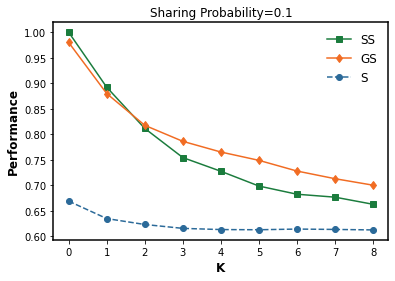

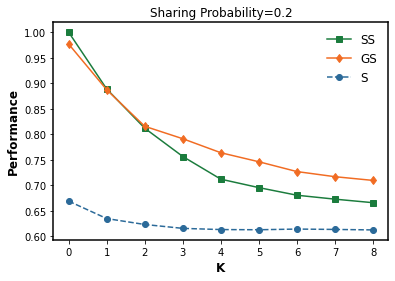

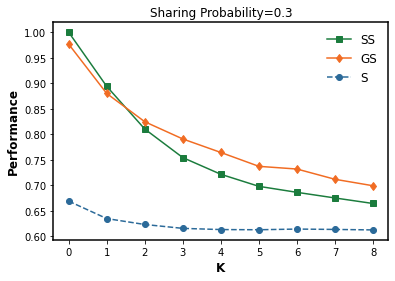

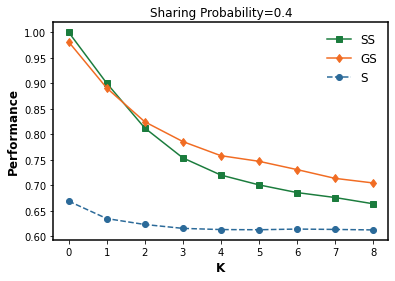

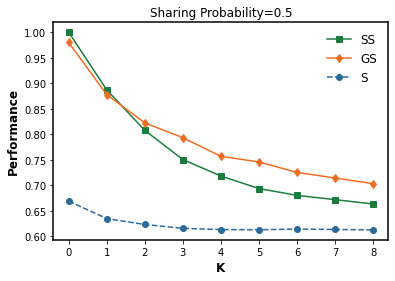

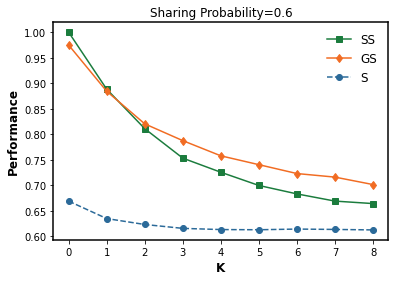

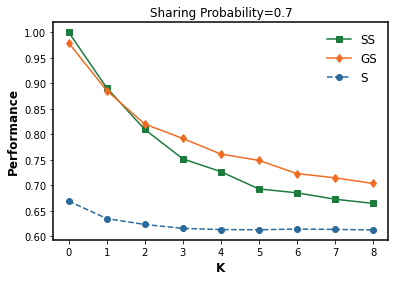

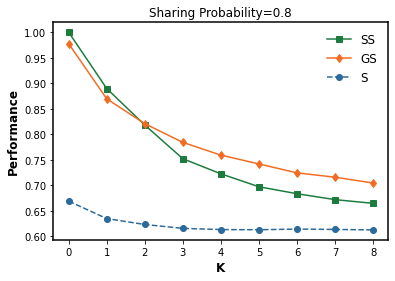

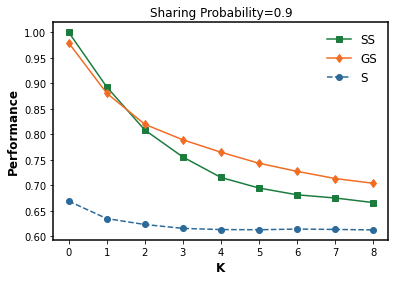

In [8]:
# S Fitness
for index, share_prob in enumerate(share_prob_list):
    x = range(len(gs_fitness))
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, ss_performance_across_prob[index], "s-", label="SS", color=nature_green)
    plt.plot(x, gs_performance_across_prob[index], "d-", label="GS", color=nature_orange)
    plt.plot(x, s_fitness, "o--", label="S", color=nature_blue)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.title("Sharing Probability={0}".format(share_prob))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Results\S_performance_prob_{0}.png".format(share_prob), transparent=True, dpi=300)
    plt.show()
# plt.clf()

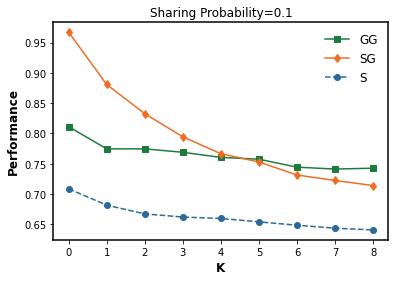

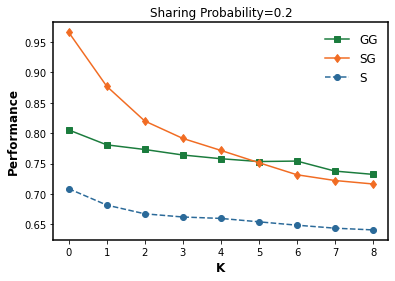

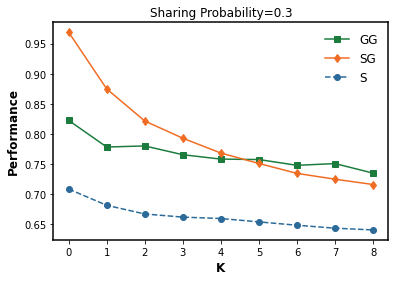

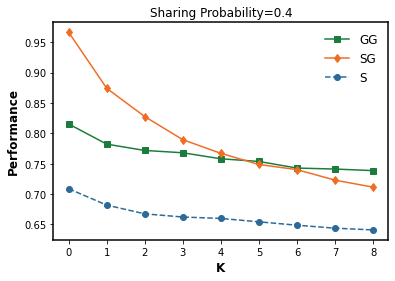

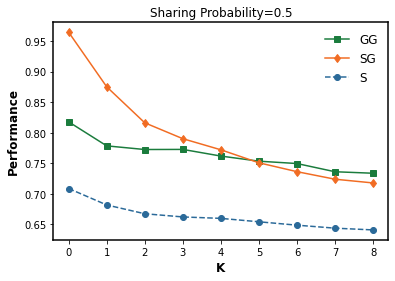

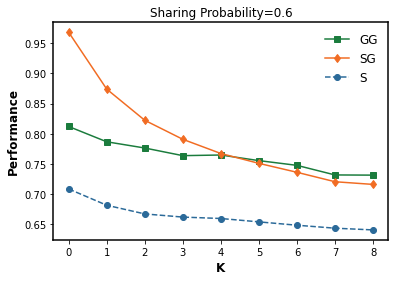

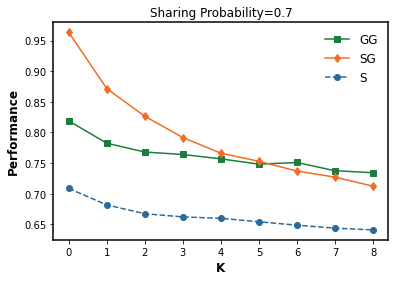

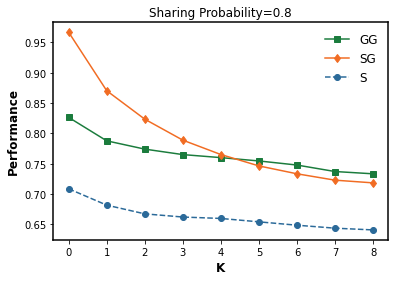

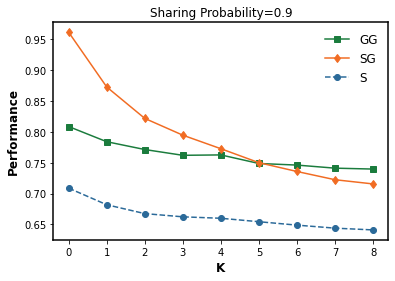

In [9]:
# G Fitness
for index, share_prob in enumerate(share_prob_list):
    x = range(len(gs_fitness))
    fig, ax = plt.subplots()
    # print(gg_performance_across_prob[index])
    # print(sg_performance_across_prob[index])
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, gg_performance_across_prob[index], "s-", label="GG", color=nature_green)
    plt.plot(x, sg_performance_across_prob[index], "d-", label="SG", color=nature_orange)
    plt.plot(x, g_fitness, "o--", label="S", color=nature_blue)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.title("Sharing Probability={0}".format(share_prob))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Results\G_performance_prob_{0}.png".format(share_prob), transparent=True, dpi=300)
    plt.show()
# plt.clf()

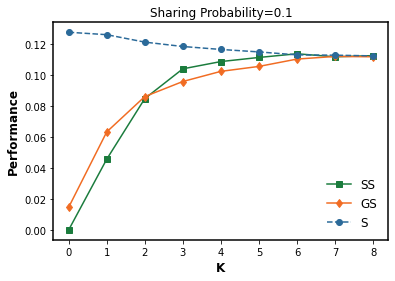

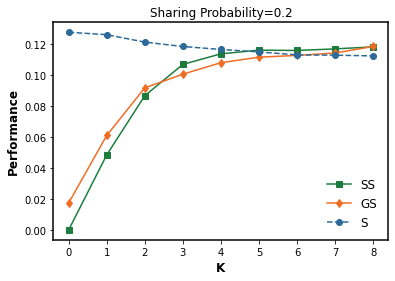

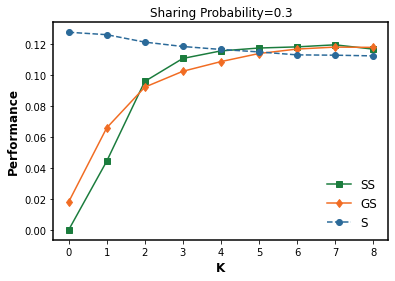

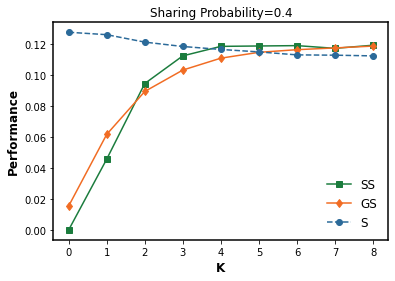

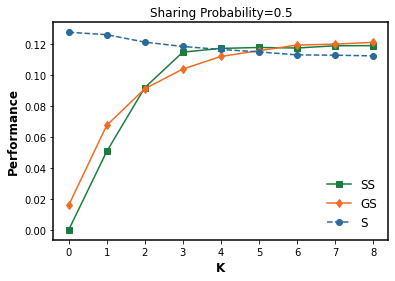

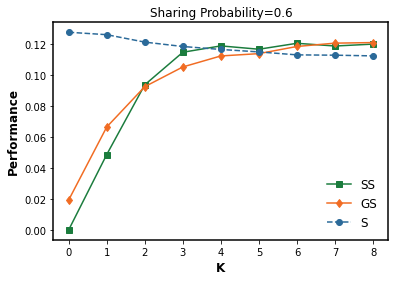

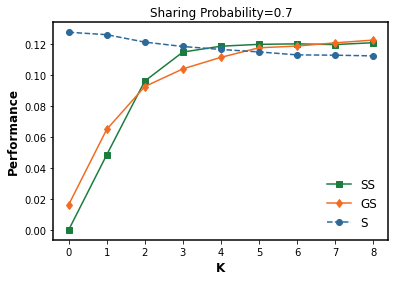

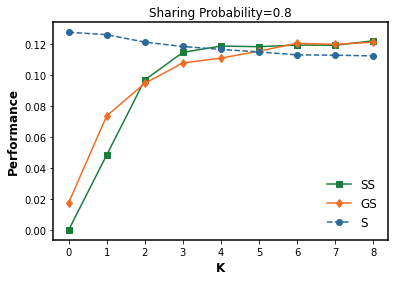

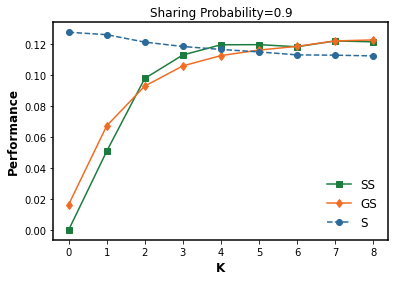

In [12]:
# S Variance
for index, share_prob in enumerate(share_prob_list):
    x = range(len(gs_fitness))
    fig, ax = plt.subplots()
    # print(gg_performance_across_prob[index])
    # print(sg_performance_across_prob[index])
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, ss_variance_across_prob[index], "s-", label="SS", color=nature_green)
    plt.plot(x, gs_variance_across_prob[index], "d-", label="GS", color=nature_orange)
    plt.plot(x, s_variance, "o--", label="S", color=nature_blue)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.title("Sharing Probability={0}".format(share_prob))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Results\S_variance_prob_{0}.png".format(share_prob), transparent=True, dpi=300)
    plt.show()
# plt.clf()

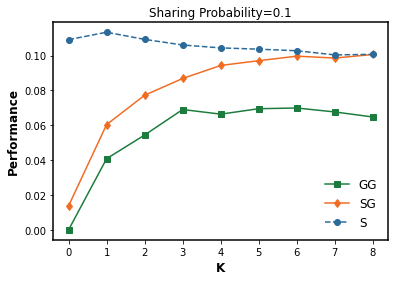

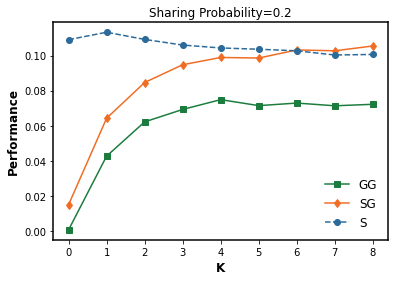

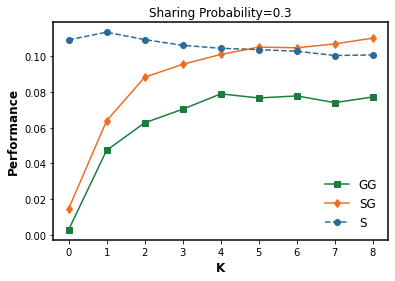

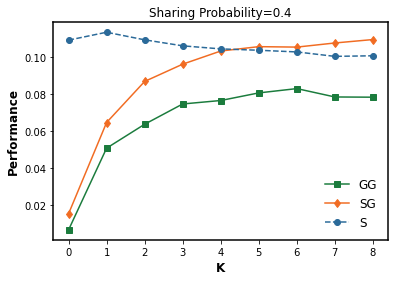

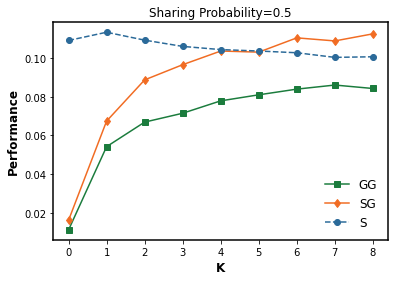

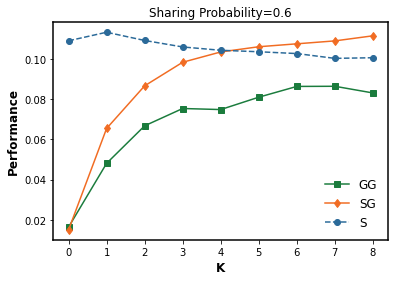

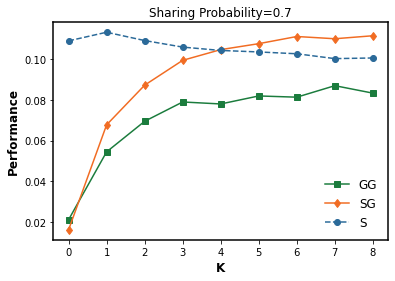

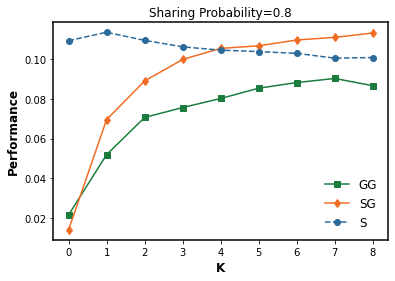

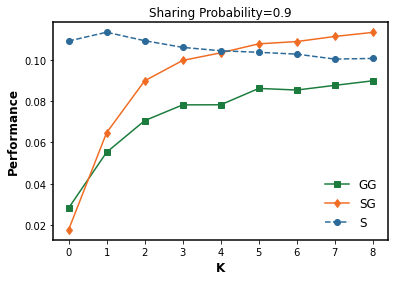

In [13]:
# G Variance
for index, share_prob in enumerate(share_prob_list):
    x = range(len(gs_fitness))
    fig, ax = plt.subplots()
    # print(gg_performance_across_prob[index])
    # print(sg_performance_across_prob[index])
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, gg_variance_across_prob[index], "s-", label="GG", color=nature_green)
    plt.plot(x, sg_variance_across_prob[index], "d-", label="SG", color=nature_orange)
    plt.plot(x, g_variance, "o--", label="S", color=nature_blue)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.title("Sharing Probability={0}".format(share_prob))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Results\G_variance_prob_{0}.png".format(share_prob), transparent=True, dpi=300)
    plt.show()
# plt.clf()

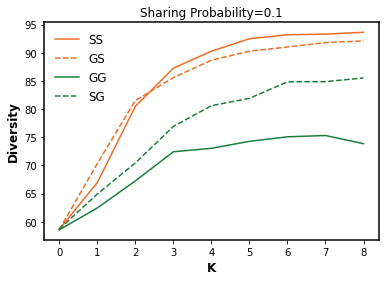

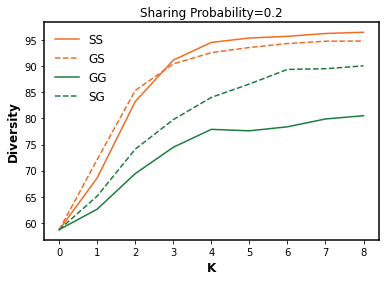

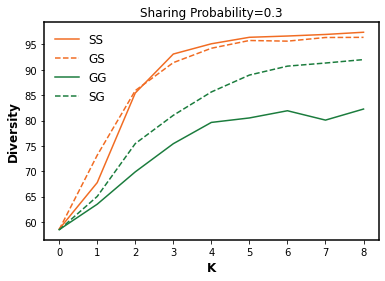

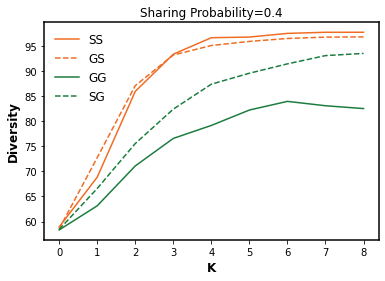

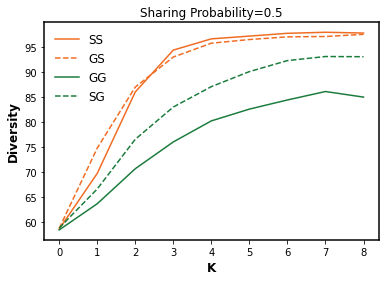

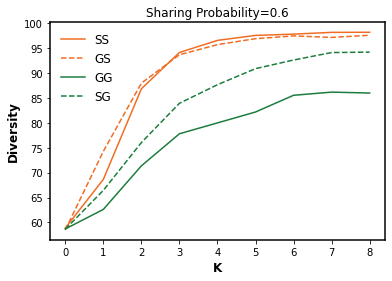

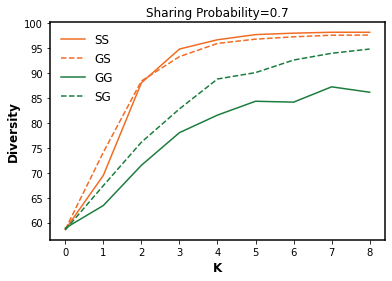

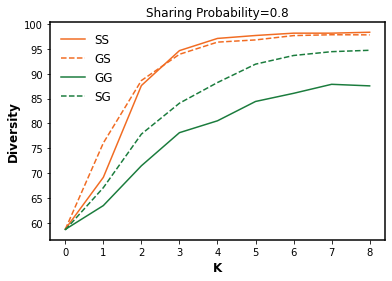

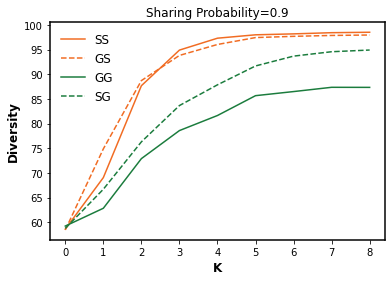

In [18]:
# S Diversity
for index, share_prob in enumerate(share_prob_list):
    x = range(len(gs_fitness))
    fig, ax = plt.subplots()
    # print(gg_performance_across_prob[index])
    # print(sg_performance_across_prob[index])
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, ss_diversity_across_prob[index], "-", label="SS", color=nature_orange)
    plt.plot(x, gs_diversity_across_prob[index], "--", label="GS", color=nature_orange)
    
    plt.plot(x, gg_diversity_across_prob[index], "-", label="GG", color=nature_green)
    plt.plot(x, sg_diversity_across_prob[index], "--", label="SG", color=nature_green)
    # plt.plot(x, s_diversity, "o--", label="S", color=nature_blue)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Diversity', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.title("Sharing Probability={0}".format(share_prob))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Results\GS_diversity_prob_{0}.png".format(share_prob), transparent=True, dpi=300)
    plt.show()
# plt.clf()